# EDA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import scipy.stats as stats
from scipy.stats import shapiro

In [3]:
import seaborn as sns
%matplotlib inline
#123

In [4]:
df = pd.read_csv("data/train.csv", sep=";")
df.head()

,Time,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL,Unusual
0,10:45,3BLTE,12.3848,1.4019,0.3927,0.0438,16.6522,0.6806,1.1293,1.0491,5,3,8,1
1,9:45,1BLTE,22.0438,2.0016,0.5620,0.2697,10.3994,1.1771,1.4480,1.1630,6,5,11,1
2,7:45,9BLTE,0.5105,0.4258,0.0152,0.0106,0.2755,0.1685,1.0379,1.0535,1,2,3,1
3,2:45,4ALTE,1.9963,1.1513,0.9908,0.0245,64.7465,0.8747,1.0766,1.0526,3,2,5,1
4,3:30,10BLTE,0.3030,0.4040,0.0160,0.0130,0.3480,0.1680,1.0110,1.0110,2,1,3,0


In [5]:
df.shape

(36904, 14)

In [6]:
df_test = pd.read_csv("data/test.csv", sep=";")
df_test.head()

,Time,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL
0,3:00,6ALTE,3.8177,1.5251,0.5829,0.0445,23.1688,0.7669,1.0262,0.0100,3,3,6
1,20:30,6ULTE,2.0210,3.3350,0.5690,0.0750,29.2650,1.0490,1.3140,0.0100,6,3,9
2,11:30,2ALTE,0.5050,0.4040,0.0140,0.0100,0.2270,0.0970,1.0110,0.0100,2,1,3
3,6:45,3CLTE,1.0110,0.5050,0.2380,0.0210,20.9620,0.6090,1.0110,1.0110,2,1,3
4,15:45,6CLTE,4.0269,0.5104,0.0807,0.0414,3.9317,1.7811,1.0575,0.0107,3,2,5


In [7]:
df_test.shape

(9158, 13)

In [64]:
#Checking for missing values
print(f"Null values for training data:\n{df.isnull().sum()}")
print(f"\nNull values for testing data:\n{df_test.isnull().sum()}")

Null values for training data:
Time           0
CellName       0
PRBUsageUL     0
PRBUsageDL     0
meanThr_DL     0
meanThr_UL     0
maxThr_DL      0
maxThr_UL      0
meanUE_DL      0
meanUE_UL      0
maxUE_DL       0
maxUE_UL       0
maxUE_UL+DL    0
Unusual        0
dtype: int64

Null values for testing data:
Time           0
CellName       0
PRBUsageUL     0
PRBUsageDL     0
meanThr_DL     0
meanThr_UL     0
maxThr_DL      0
maxThr_UL      0
meanUE_DL      0
meanUE_UL      0
maxUE_DL       0
maxUE_UL       0
maxUE_UL+DL    0
dtype: int64


In [36]:
#Removing rows if it is missing data
df = df.dropna()
df_test = df_test.dropna()

In [75]:
#Convert time into a h:m format
Time = pd.to_datetime(df.Time, format = '%H:%M')

In [76]:
#obtaining unique cells
Cells = []

for i in df.CellName:
    if i not in Cells:
        Cells = np.append(Cells, i)

In [77]:
#Splitting features into features with anomalous and normal behaviour
Anomalous_df = df.groupby('Unusual').get_group(1)
Normal_df = df.groupby('Unusual').get_group(0)

In [78]:
Anomalous_df.shape

(10183, 14)

In [79]:
Normal_df.shape

(26721, 14)

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


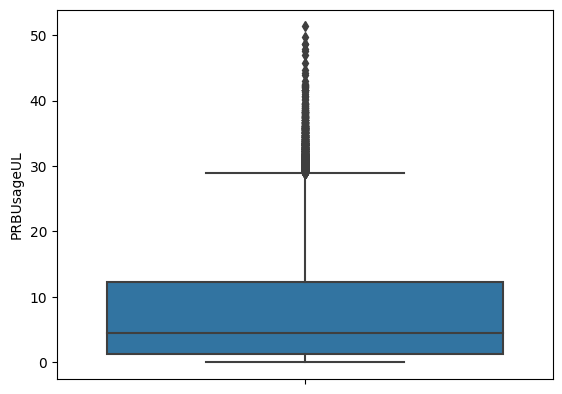

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


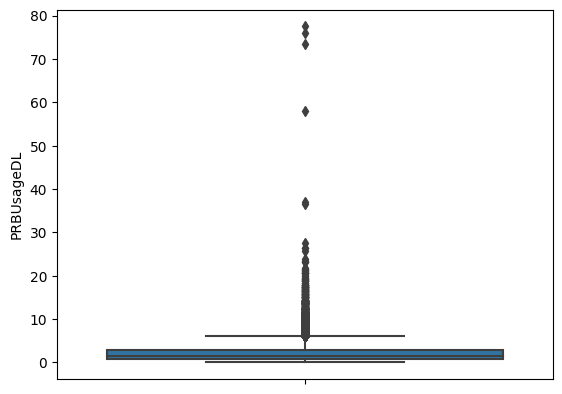

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


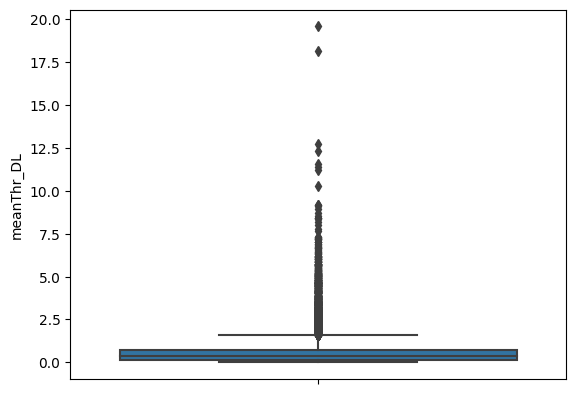

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


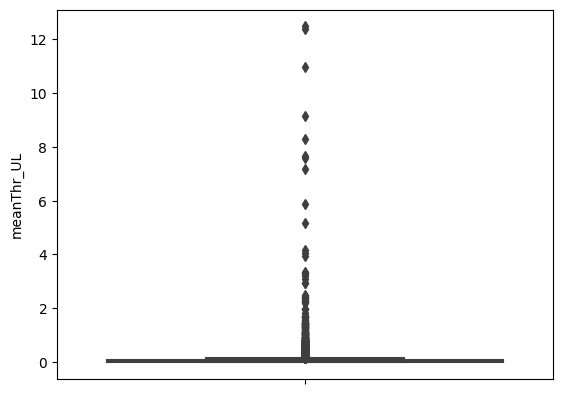

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


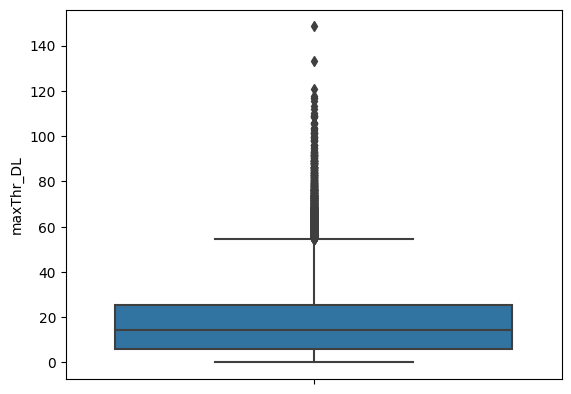

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


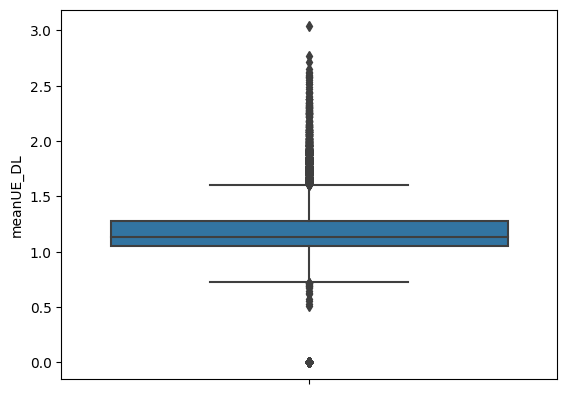

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


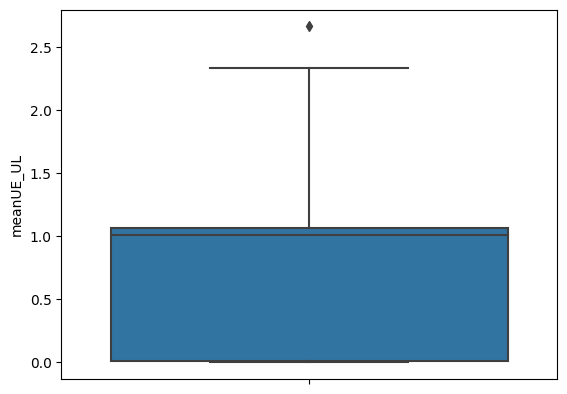

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


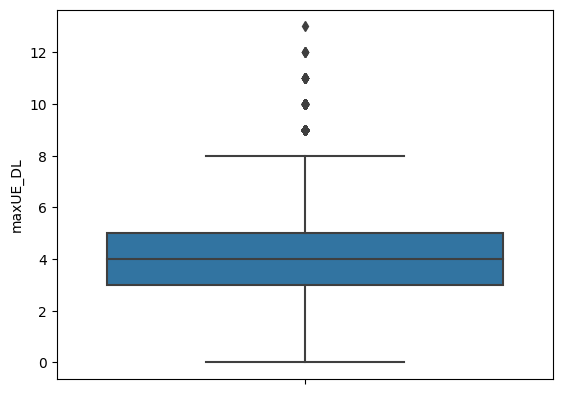

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


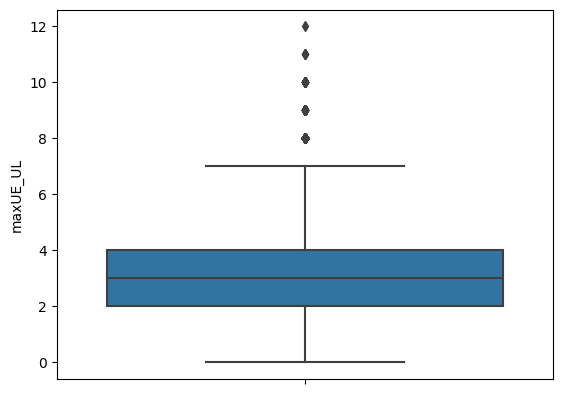

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


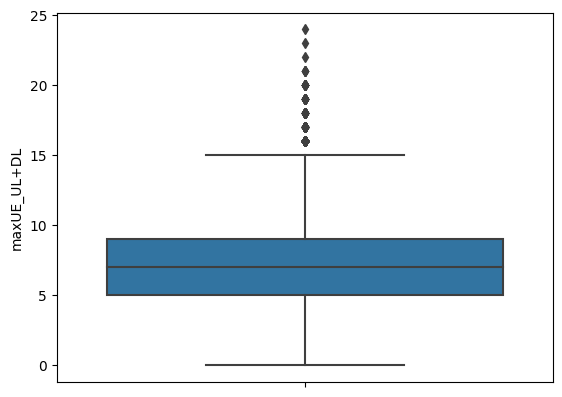

In [90]:
#Boxplots for all features (excluding Time and CellName)
variables = ["PRBUsageUL", "PRBUsageDL","meanThr_DL","meanThr_UL","maxThr_DL","meanUE_DL","meanUE_UL","maxUE_DL","maxUE_UL","maxUE_UL+DL"]

for i in variables:
    sns.boxplot(y = df[f"{i}"])
    plt.show()

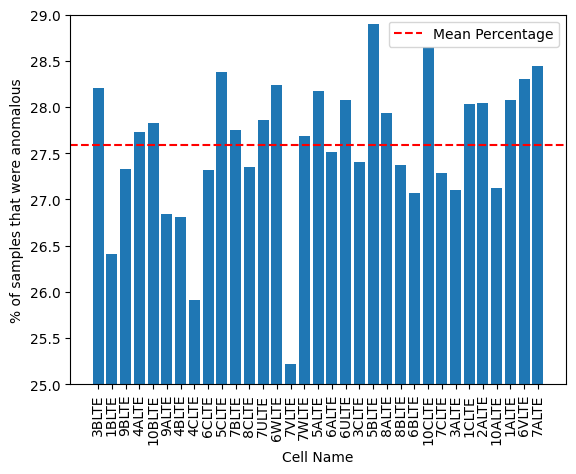

In [81]:
#Obtaining sum of anomalies and total count for each cell to determine percentage of instances being anomalies for each cell
Percentages = []

for i in Cells:
    globals()[f"{i}_Unusual"] = df.groupby("CellName").Unusual.sum()[i]
    globals()[f"{i}_Count"] = df.groupby("CellName").Unusual.count()[i]
    globals()[f"{i}_Percentage"] = globals()[f"{i}_Unusual"] / globals()[f"{i}_Count"] * 100
    Percentages.append(globals()[f"{i}_Percentage"])

#Graph of percentage of abnormal behaviour for each cell
plt.bar(Cells,Percentages)
plt.ylim(25,29)
plt.xlabel("Cell Name")
plt.ylabel("% of samples that were anomalous")
plt.axhline(np.mean(Percentages),label = 'Mean Percentage', linestyle = '--', color = 'red')
plt.xticks(rotation = 90) 
plt.legend()
plt.show()